## **Modelo de despegue (Ecuación integral)**

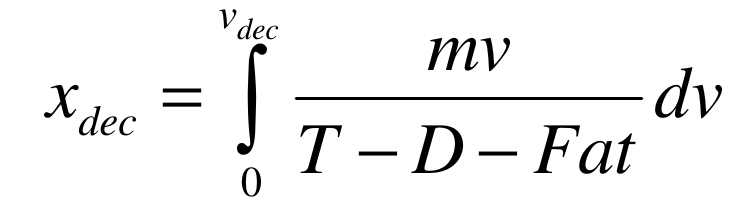

Importando modulos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

Declaración de constantes:


In [ ]:
S_ref = 1.5
CL_0 = 0.5
CL_a = 4
CL_max = 1.9
CD_0 = 0.04
K1 = 0.06
K2 = 0.1
T0 = 40
T1 = -0.386
T2 = -0.011
rho_ref = 1.225
mu = 0.04
rho = 1.1
g = 9.81
masa = 14
K_s = 1.1
alfa_despegue = 0

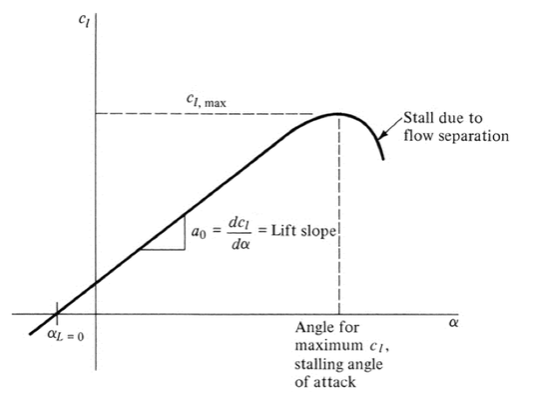

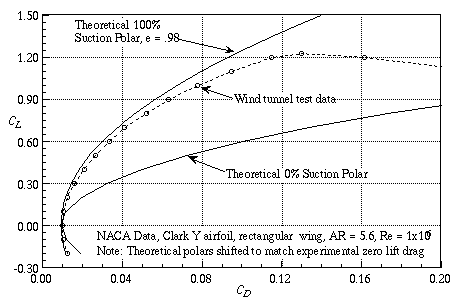

Vamos a calcular primeramente la velocidad de entrada en perdida:

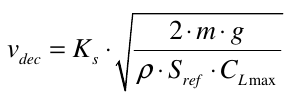


In [ ]:
V_dec = K_s*np.sqrt((2*masa*g)/(rho*S_ref*CL_max))
V_dec

10.296448033436732

Conociendo esta velocidad, podemos crear um vector para integrar desde 0 hasta la velocidad de despegue:

In [ ]:
velocidad_vec = np.linspace(0,V_dec,50)
velocidad_vec

array([ 0.        ,  0.21013159,  0.42026319,  0.63039478,  0.84052637,
        1.05065796,  1.26078956,  1.47092115,  1.68105274,  1.89118433,
        2.10131593,  2.31144752,  2.52157911,  2.7317107 ,  2.9418423 ,
        3.15197389,  3.36210548,  3.57223707,  3.78236867,  3.99250026,
        4.20263185,  4.41276344,  4.62289504,  4.83302663,  5.04315822,
        5.25328981,  5.46342141,  5.673553  ,  5.88368459,  6.09381618,
        6.30394778,  6.51407937,  6.72421096,  6.93434255,  7.14447415,
        7.35460574,  7.56473733,  7.77486892,  7.98500052,  8.19513211,
        8.4052637 ,  8.61539529,  8.82552689,  9.03565848,  9.24579007,
        9.45592166,  9.66605326,  9.87618485, 10.08631644, 10.29644803])

Ahora necesitamos escribir las velocidades que son dependientes de la velocidad:

Empezando con el modelo dinámico de tracción:


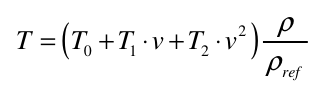

In [ ]:
T = (T0 + T1*velocidad_vec + T2*velocidad_vec**2)*(rho/rho_ref)
#T = T0*np.ones(50)

Podemos gráficar este modelo en funcion de la velocidad:

Text(0, 0.5, 'Tracción [N]')

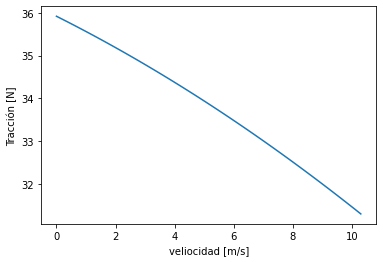

In [ ]:
plt.plot(velocidad_vec,T)
plt.xlabel("veliocidad [m/s]")
plt.ylabel("Tracción [N]")

Fuerza de arrastre:


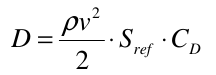

In [ ]:
CL = CL_0 + alfa_despegue*CL_a
CD = CD_0 + K1*CL + K2*CL**2
D = 0.5*rho*velocidad_vec**2 *S_ref*CD
CD

0.095

Text(0, 0.5, 'Arrastre [N]')

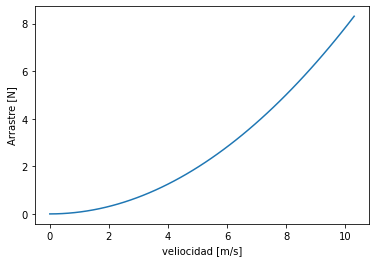

In [ ]:
plt.plot(velocidad_vec,D)
plt.xlabel("veliocidad [m/s]")
plt.ylabel("Arrastre [N]")

Fuerza de sustentación:


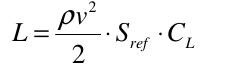

In [ ]:
L = 0.5*rho*velocidad_vec**2 * S_ref * CL

Text(0, 0.5, 'Sustentación [N]')

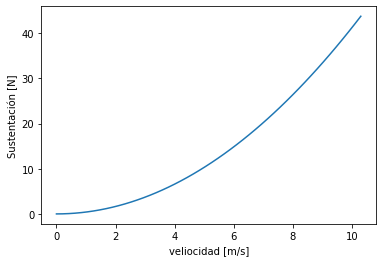

In [ ]:
plt.plot(velocidad_vec,L)
plt.xlabel("veliocidad [m/s]")
plt.ylabel("Sustentación [N]")

Fuerza de fricción:


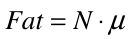


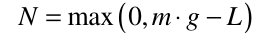


In [ ]:
Fat = []
for i in range(len(L)):
  N = np.max([0, masa*g - L[i]])
  Fat.append(N*mu)

Text(0, 0.5, 'Fuerza de fricción [N]')

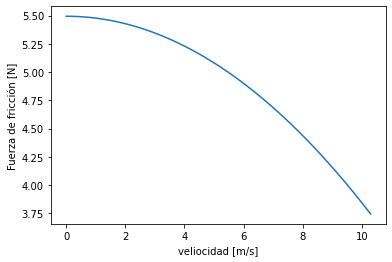

In [ ]:
plt.plot(velocidad_vec,Fat)
plt.xlabel("veliocidad [m/s]")
plt.ylabel("Fuerza de fricción [N]")

Calculando la derivada de la distancia en relacion a la velocidad:


In [ ]:
dx_dv = (masa*velocidad_vec)/(T-D-Fat)


Text(0, 0.5, 'dx_dv')

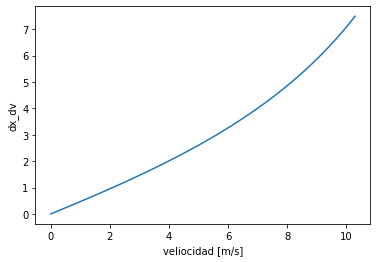

In [ ]:
plt.plot(velocidad_vec,dx_dv)
plt.xlabel("veliocidad [m/s]")
plt.ylabel("dx_dv")

Realizando la integración:


In [ ]:
distancia = integrate.trapz(velocidad_vec,dx_dv)
distancia

46.00898446987783